## Data Description

The data used in this work is credited to the work carried away by P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

This data has to do with a red wine quality of a Portuguese "Vinho Verde" wine and comprises physicochemical properties of the wine. These characteristics were obtained from May/2004 to February/2007 when samples were tested at the official certification entity - CVRVV - whose goal is to improve the quality and marketing of vinho verde.
It is composed by 1599 entries, each row being a diferent wine sample and each collumn being a physicochemical test performed on the sample, having a total of 11 tests performed. There is a 12th collumn, which corresponds to the final rating the wine received. Details on the data and its purposes can be found at [Cortez et al., 2009].

The phisicochemical tests are:
- Fixed acidity (mg/L): Acids are a major component of wine. Fixed acids are the acids that originally produced in the grape or later during the fermentation process by yeast, and therefore nonvolatile. These are tartaric, malic, citric (all produced by the grape) and succinic (by the yeast). Type: double;
- Volatile acidity (mg/L): These are the acids formed as a byproduct of fermentation and are released as steam. It is almost only acetic acid but it can also be lactic, formic, butyric, and propionic acids. Type: double;
- Citric acid (mg/L): An organic weak acid and therefore used to preserve the wine and stop microbial and mold activity. Can also be added to increase the acidity of flavor of the wine. Type: double;
- Residual sugar (g/L): Residual sugars refer to the natural sugars present in grapes (glucose, fructose) that remain in the wine even after fermentation takes place. Type: double;
- Chlorides (g/L): Chlorides are eletrolytes and can therefore help reducing wine acidity. Type: double;
- Free sulfur dioxide (mg/L): Used to calculate the amount of sulfur dioxide used, it is the sulfur dioxide that did not bind with any other molecule. Type: double;
- Total sulfur dioxide (mg/L): Sulfur dioxide is used throughout winemaking stages to prevent oxidation and microbial growth;
- Density (g/mL): Mass per volume of wine, used to estimate the quality of the wine. Type: double;
- pH: Measures the acidity of the wine in the pH scale. All wines lie on the acidic range (2.5-4.5). Type: double;
- Sulphates (g/L): This should be sulfites and not sulphates, as the firsts are not used in wine making. Sulfites occurr naturaly in grapes and act as a preservative by inhibiting microbial growth. Type: double;
- Alcohol (%): Percentage of alcohol per volume, the direct product of fermentation. Type: double;

The last feature, corresponding to the rating, was obtained by using at least three sensory assessors (using blind tastes) which attributed a rating from 0 (very bad) to 10 (excellent). The final rating is the average of the ratings. The type of this feature is therefore, int. 

## Data Analysis

In [51]:
library(e1071)
library(ggplot2)
library(GGally)
require(gridExtra)
library(purrr)
library(tidyr)
library(reshape)
library(FSA)
library(dplyr)
library(repr)
source("stratified.r")
set.seed(123)

In [52]:
raw_data = read.csv('winequality-red.csv')
raw_data$quality = factor(raw_data$quality)

In [53]:
head(raw_data)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


In [54]:
# Do stratified sampling to reduce dataset to no larger than 100-200 entities
data = stratified(raw_data, 'quality', .1)

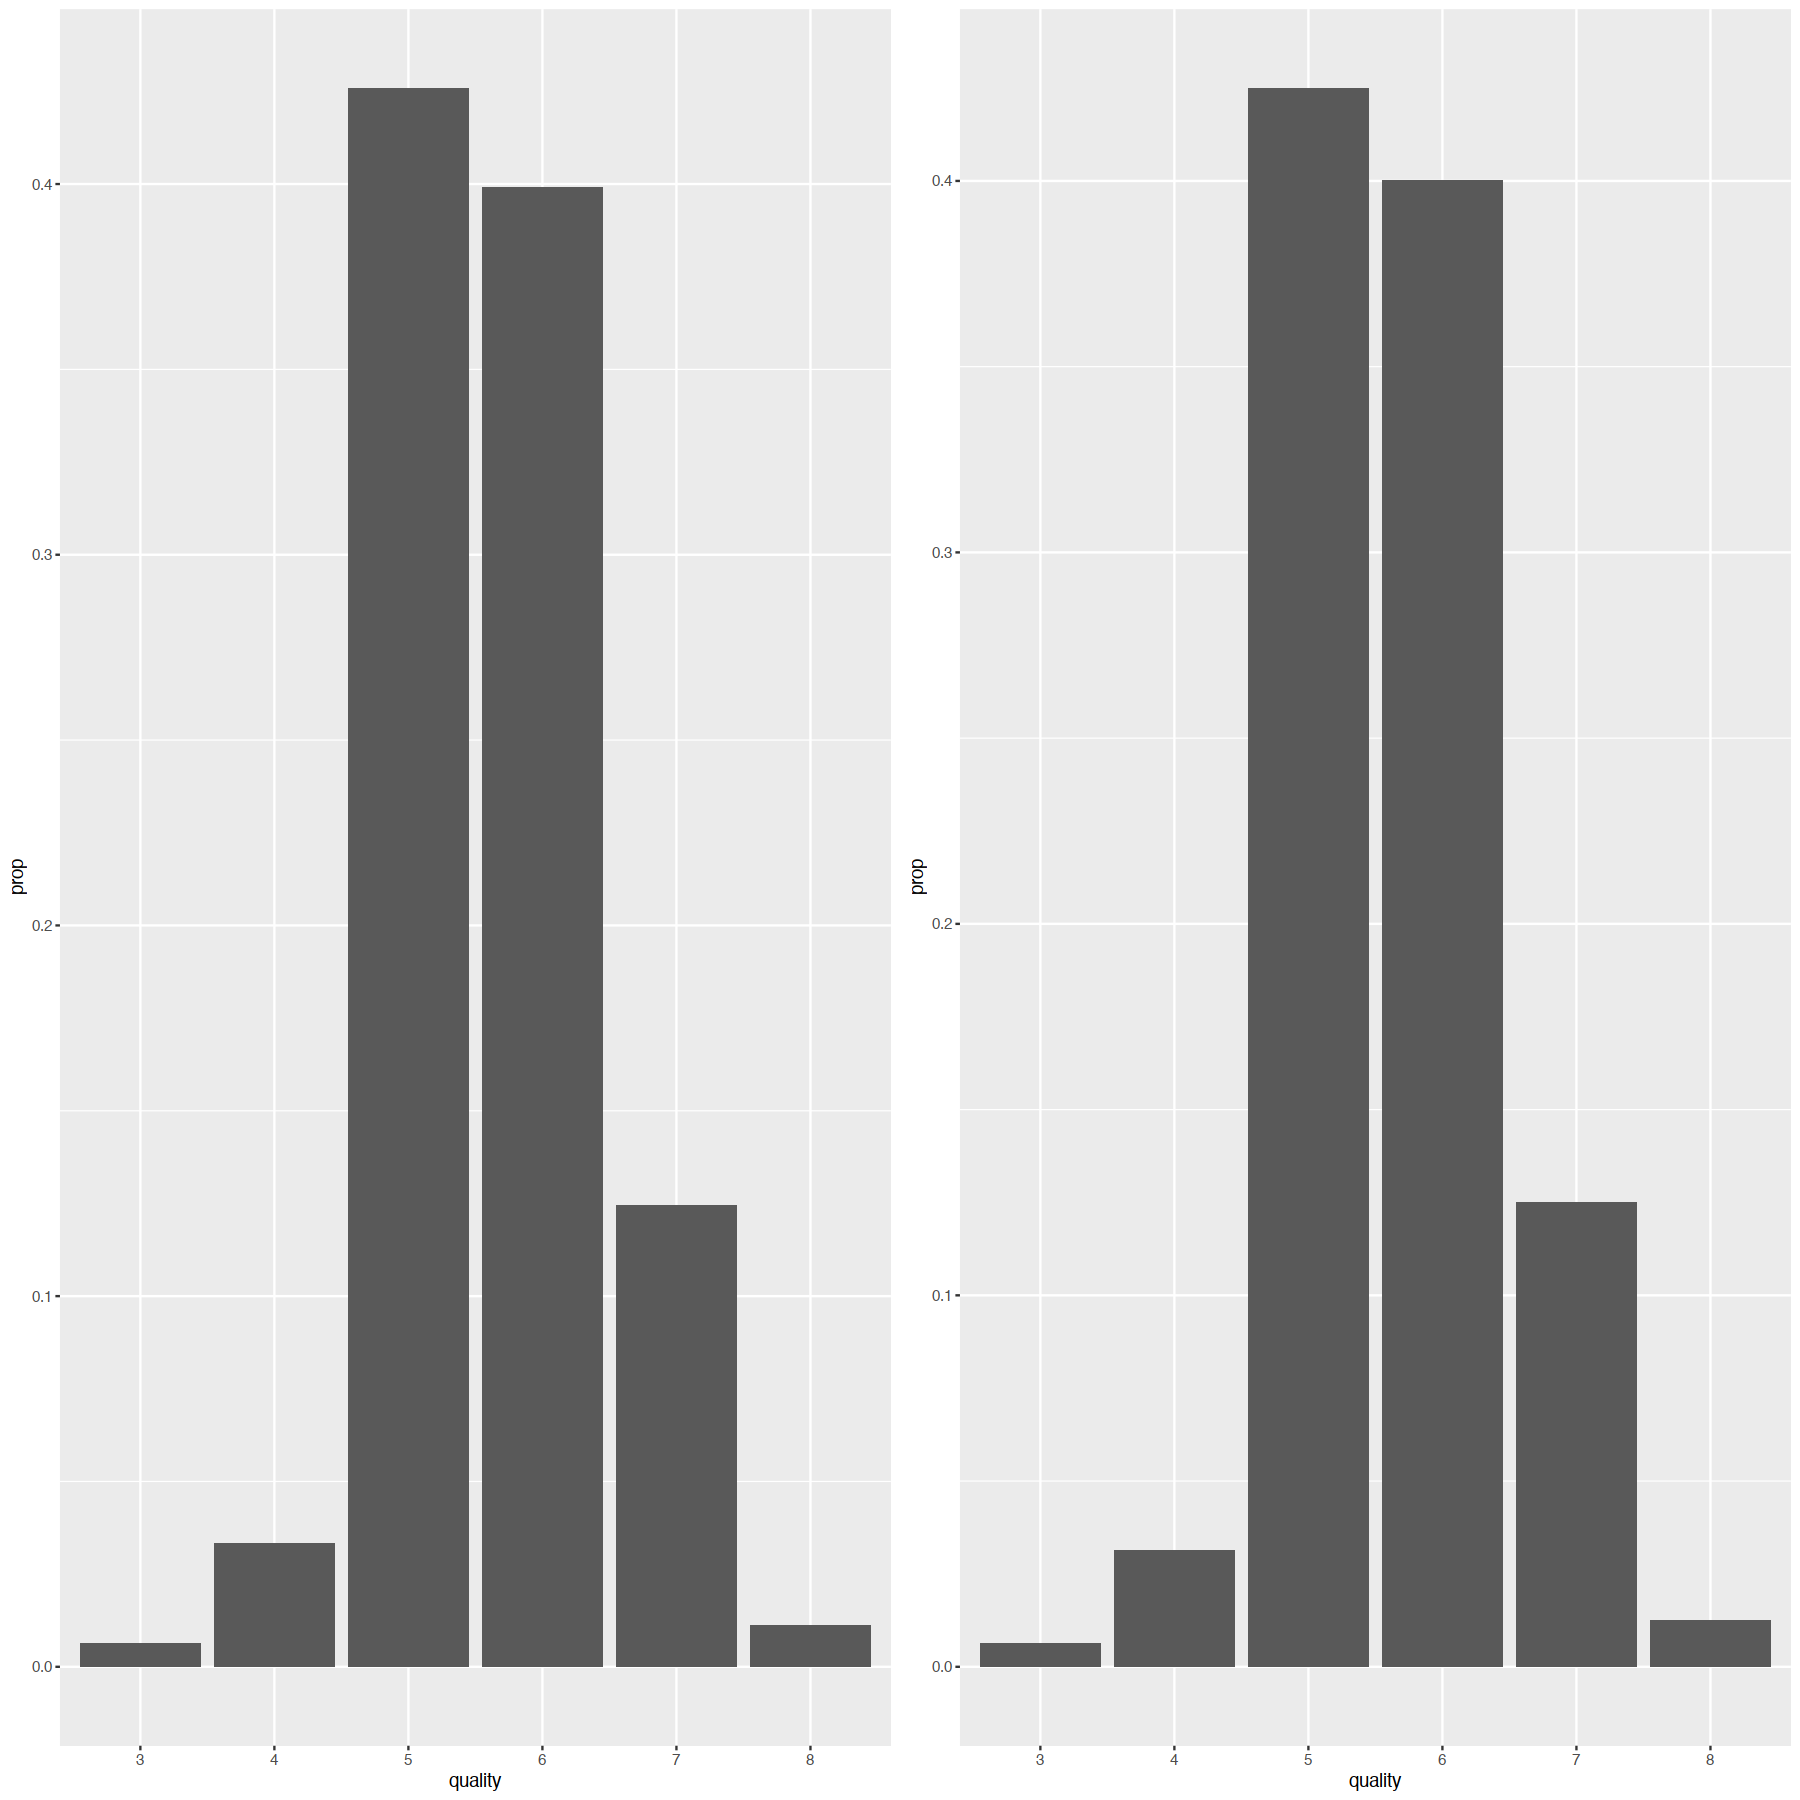

In [55]:
# check proportions are still the same
raw_plot = ggplot(raw_data, aes(x=quality)) + geom_bar(aes(y = ..prop.., group = 1))
strat_plot = ggplot(data, aes(x=quality)) + geom_bar(aes(y = ..prop.., group = 1))
grid.arrange(raw_plot, strat_plot, ncol=2)

In [56]:
summary(data)

 fixed.acidity    volatile.acidity  citric.acid     residual.sugar
 Min.   : 5.400   Min.   :0.1800   Min.   :0.0000   Min.   :1.20  
 1st Qu.: 7.200   1st Qu.:0.3900   1st Qu.:0.1275   1st Qu.:1.90  
 Median : 8.200   Median :0.5250   Median :0.2800   Median :2.10  
 Mean   : 8.505   Mean   :0.5236   Mean   :0.2938   Mean   :2.42  
 3rd Qu.: 9.425   3rd Qu.:0.6300   3rd Qu.:0.4400   3rd Qu.:2.50  
 Max.   :13.000   Max.   :1.2400   Max.   :0.7400   Max.   :6.70  
   chlorides       free.sulfur.dioxide total.sulfur.dioxide    density      
 Min.   :0.03900   Min.   : 1.00       Min.   :  8.00       Min.   :0.9923  
 1st Qu.:0.07300   1st Qu.: 7.00       1st Qu.: 19.75       1st Qu.:0.9958  
 Median :0.08000   Median :13.00       Median : 38.50       Median :0.9968  
 Mean   :0.09496   Mean   :16.14       Mean   : 47.72       Mean   :0.9968  
 3rd Qu.:0.09500   3rd Qu.:22.00       3rd Qu.: 66.25       3rd Qu.:0.9978  
 Max.   :0.41500   Max.   :66.00       Max.   :153.00       Max.   :1

Qualities 3, 4 and 8 will be removed for only having 1, 5 and 2 samples, respectively.

In [57]:
data = subset(data, (quality == 5 | quality == 6 | quality == 7))

In [58]:
head(data)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
471,13.0,0.32,0.65,2.6,0.093,15,47,0.99960,3.05,0.61,10.6,5
523,8.2,0.39,0.49,2.3,0.099,47,133,0.99790,3.38,0.99,9.8,5
18,8.1,0.56,0.28,1.7,0.368,16,56,0.99680,3.11,1.28,9.3,5
759,8.1,0.87,0.00,2.2,0.084,10,31,0.99656,3.25,0.50,9.8,5
1559,6.9,0.63,0.33,6.7,0.235,66,115,0.99787,3.22,0.56,9.5,5
1414,9.9,0.57,0.25,2.0,0.104,12,89,0.99630,3.04,0.90,10.1,5


# Bivariate analysis

In [59]:
library(FactoMineR)

Warning message in ggscatmat(data, color = "quality", alpha = 0.8):
“Factor variables are omitted in plot”


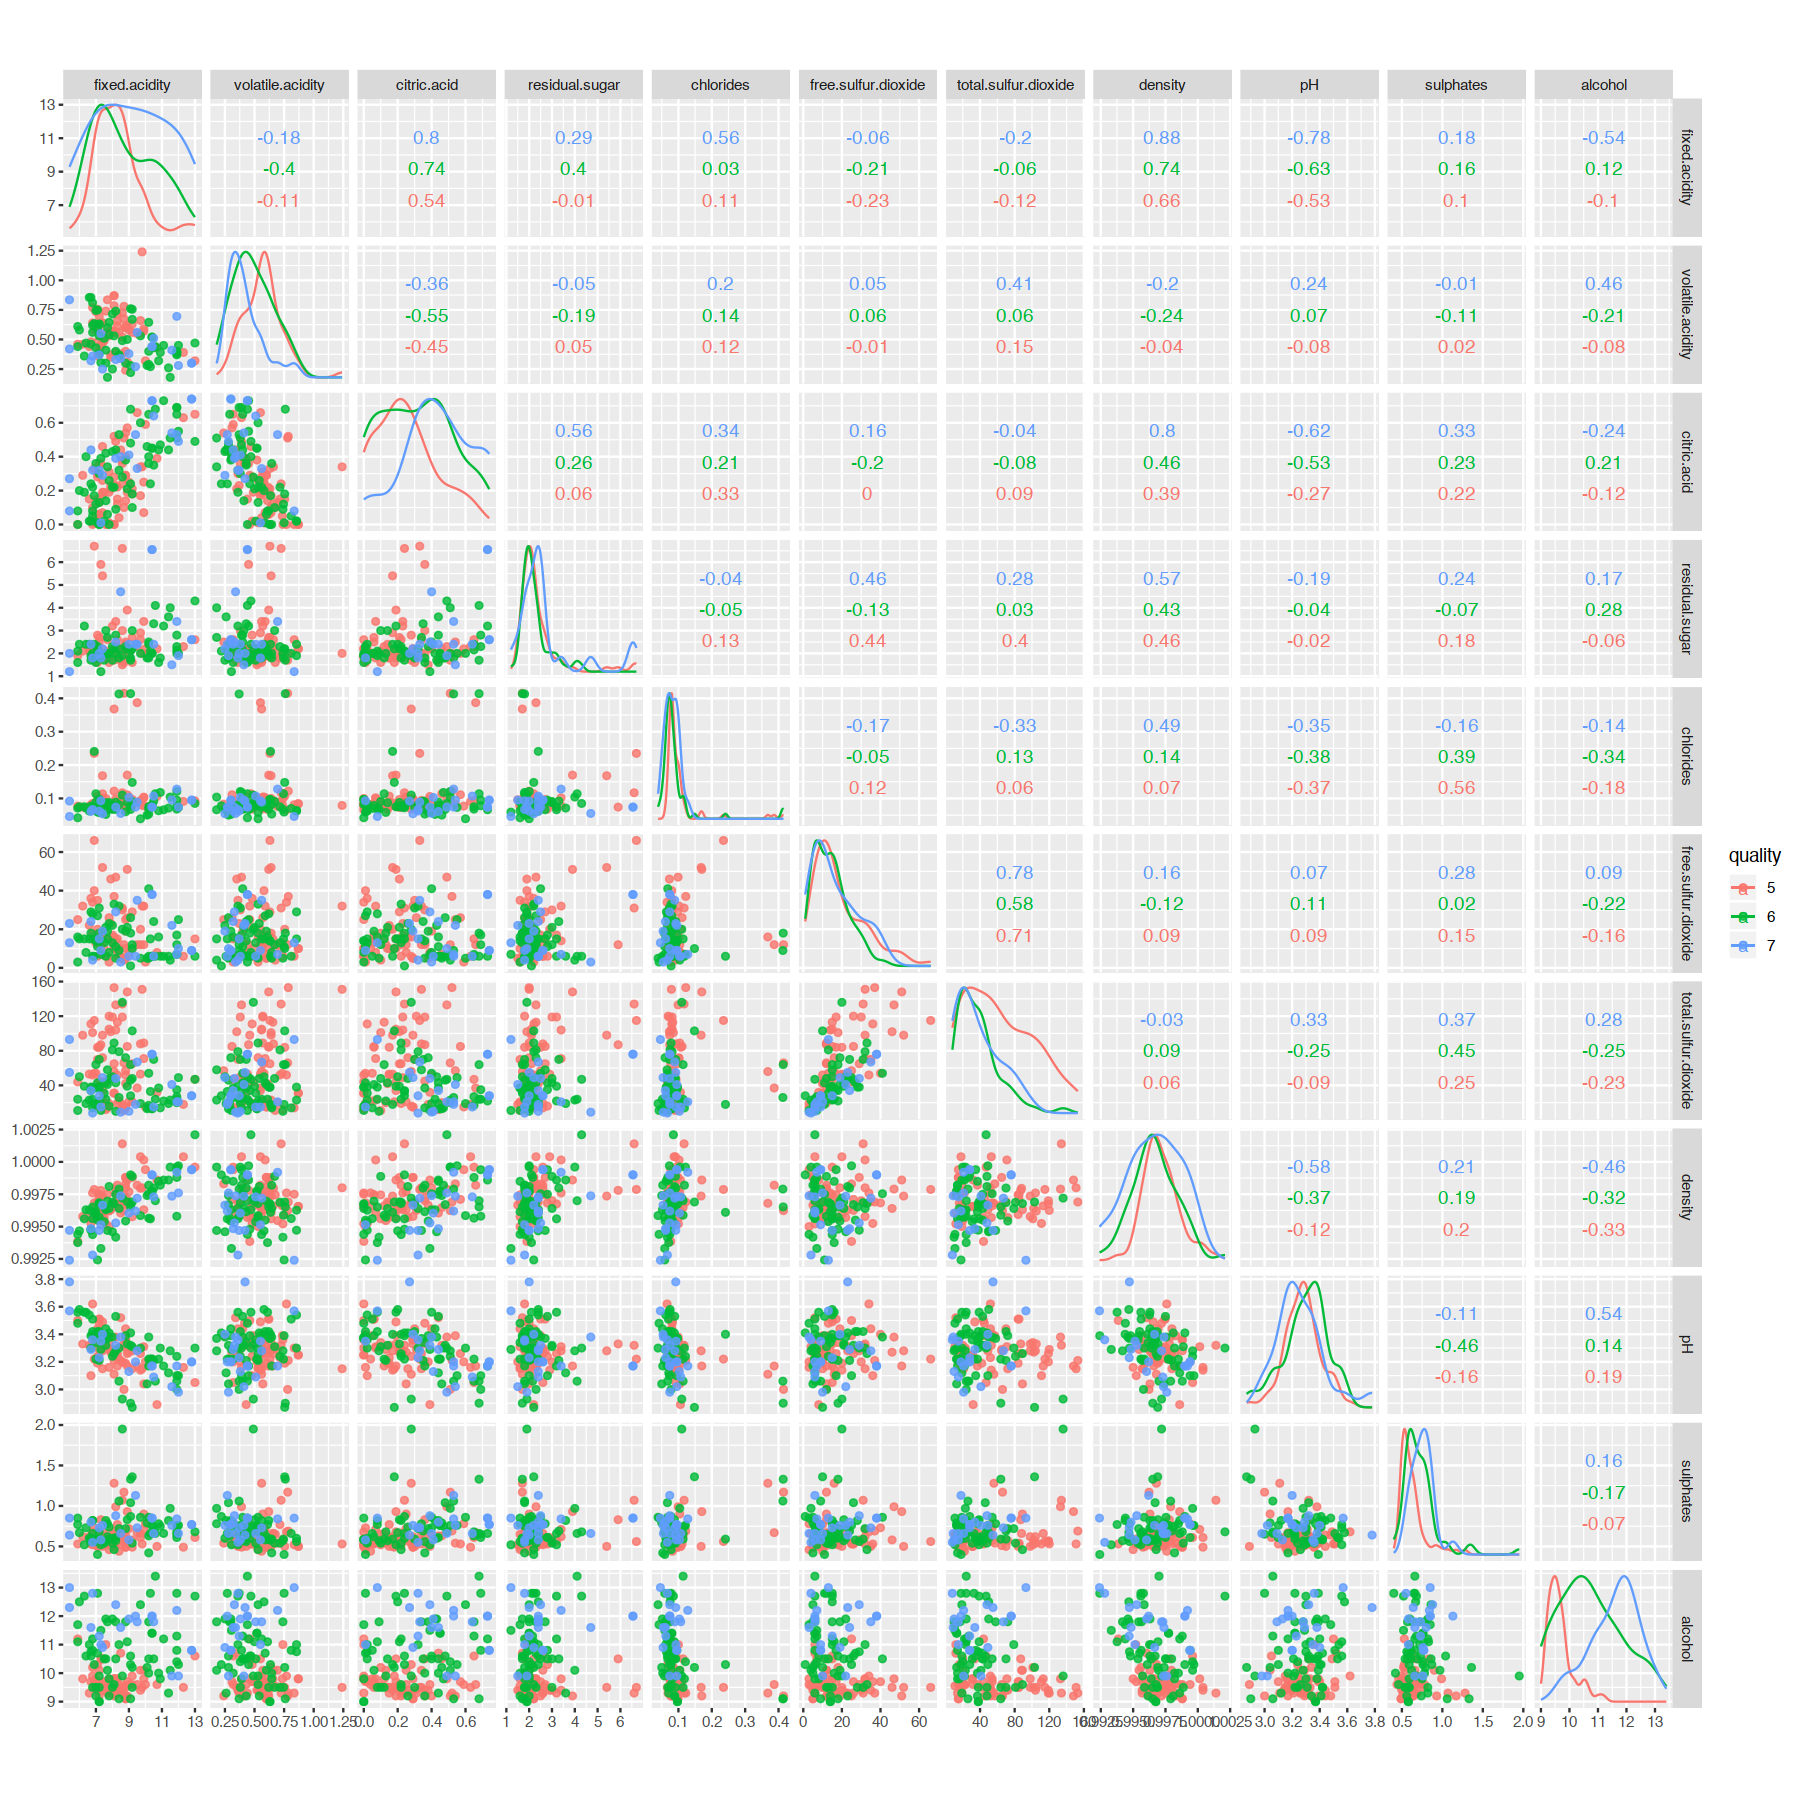

In [60]:
options(repr.plot.width=15, repr.plot.height=15)
ggscatmat(data, color="quality", alpha=0.8)

# APENAS TESTES DAQUI PARA BAIXO

In [10]:
for (i in 1:4) {
    for (j in (i+1):5) {
        print(paste0(i, '-', j))
        CA(data, graph=TRUE, axes=c(i, j))
    }
}

[1] "1-2"


ERROR: Error in CA(data, graph = TRUE, axes = c(i, j)): 
The following variables are not quantitative:  quality


### http://www.sthda.com/english/articles/31-principal-component-methods-in-r-practical-guide/115-famd-factor-analysis-of-mixed-data-in-r-essentials/

In [9]:
res.famd <- FAMD(data, graph = FALSE)
print(res.famd)

*The results are available in the following objects:

  name          description                             
1 "$eig"        "eigenvalues and inertia"               
2 "$var"        "Results for the variables"             
3 "$ind"        "results for the individuals"           
4 "$quali.var"  "Results for the qualitative variables" 
5 "$quanti.var" "Results for the quantitative variables"


In [14]:
library("factoextra")
eig.val <- get_eigenvalue(res.famd)
head(eig.val)

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,3.172297,19.826857,19.82686
Dim.2,2.618111,16.363196,36.19005
Dim.3,1.587999,9.924996,46.11505
Dim.4,1.424991,8.906197,55.02125
Dim.5,1.260703,7.879394,62.90064


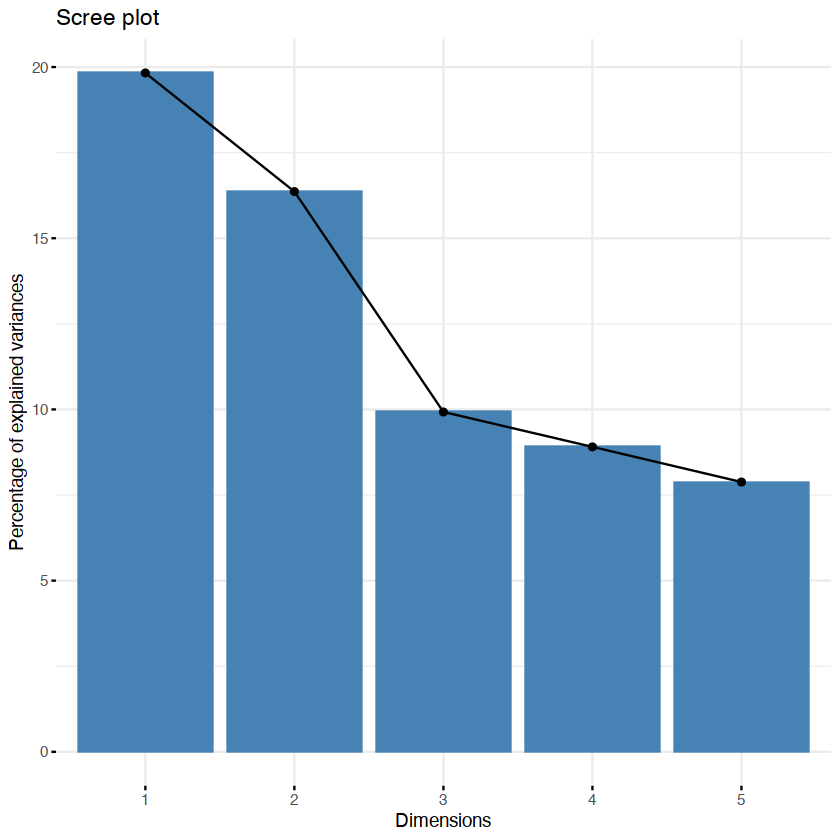

In [16]:
fviz_screeplot(res.famd)

### All variables

In [17]:
var <- get_famd_var(res.famd)
var

FAMD results for variables 
  Name       Description                      
1 "$coord"   "Coordinates"                    
2 "$cos2"    "Cos2, quality of representation"
3 "$contrib" "Contributions"                  

In [18]:
# Coordinates of variables
head(var$coord)
# Cos2: quality of representation on the factore map
head(var$cos2)
# Contributions to the  dimensions
head(var$contrib)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
fixed.acidity,0.748766998,0.000390863,0.057129768,0.0601277635,0.0030360134
volatile.acidity,0.272216686,0.132930566,0.054931954,0.0063508385,0.2252150185
citric.acid,0.750067072,0.018243583,0.006240586,0.0003696606,0.0006378959
residual.sugar,0.091966067,0.057434056,0.196911239,0.2926725629,0.0836692104
chlorides,0.066670529,0.166376248,0.065485880,0.1852831034,0.1969540702
free.sulfur.dioxide,0.002118503,0.346761496,0.428359893,0.0076797169,0.0114251801


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
fixed.acidity,5.606520e-01,1.527739e-07,3.263810e-03,3.615348e-03,9.217377e-06
volatile.acidity,7.410192e-02,1.767054e-02,3.017520e-03,4.033315e-05,5.072180e-02
citric.acid,5.626006e-01,3.328283e-04,3.894492e-05,1.366489e-07,4.069112e-07
residual.sugar,8.457757e-03,3.298671e-03,3.877404e-02,8.565723e-02,7.000537e-03
chlorides,4.444959e-03,2.768106e-02,4.288400e-03,3.432983e-02,3.879091e-02
free.sulfur.dioxide,4.488054e-06,1.202435e-01,1.834922e-01,5.897805e-05,1.305347e-04


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
fixed.acidity,23.60330610,0.0149292,3.5975939,4.21951749,0.24081909
volatile.acidity,8.58105899,5.0773458,3.4591924,0.44567555,17.86424115
citric.acid,23.64428823,0.6968223,0.3929842,0.02594125,0.05059843
residual.sugar,2.89903699,2.1937209,12.3999569,20.53854872,6.63671082
chlorides,2.10164834,6.3548194,4.1237976,13.00240107,15.62255940
free.sulfur.dioxide,0.06678135,13.2447192,26.9748149,0.53893073,0.90625471


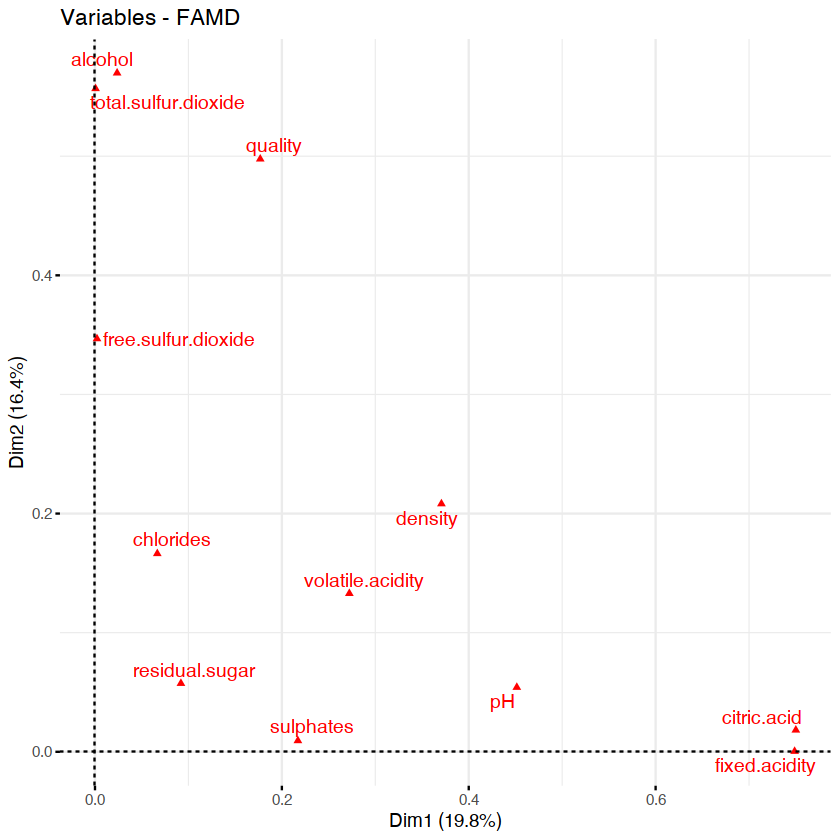

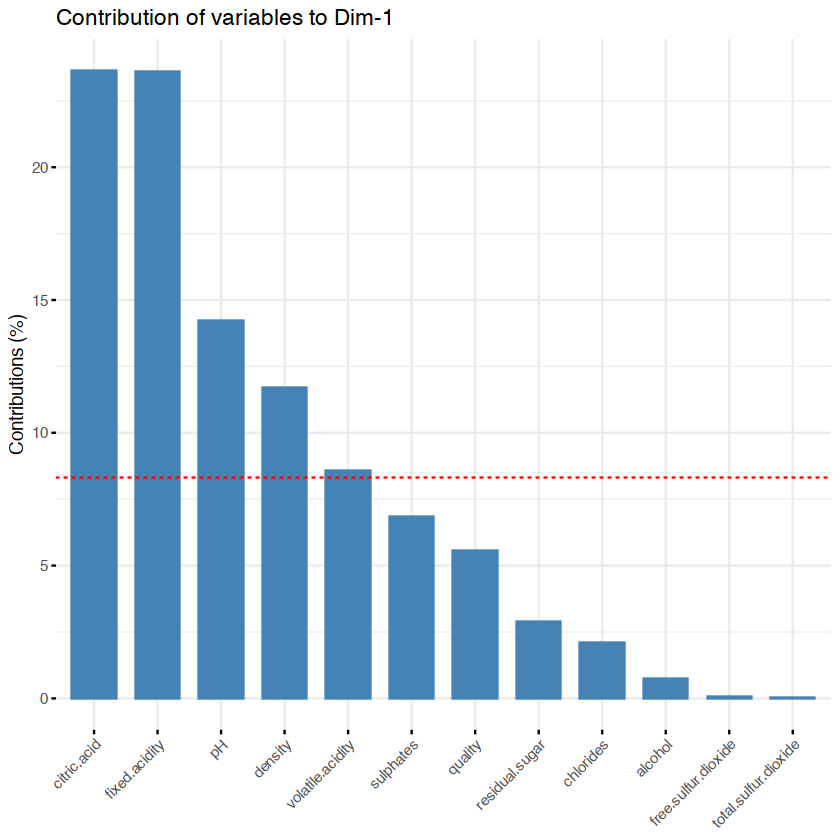

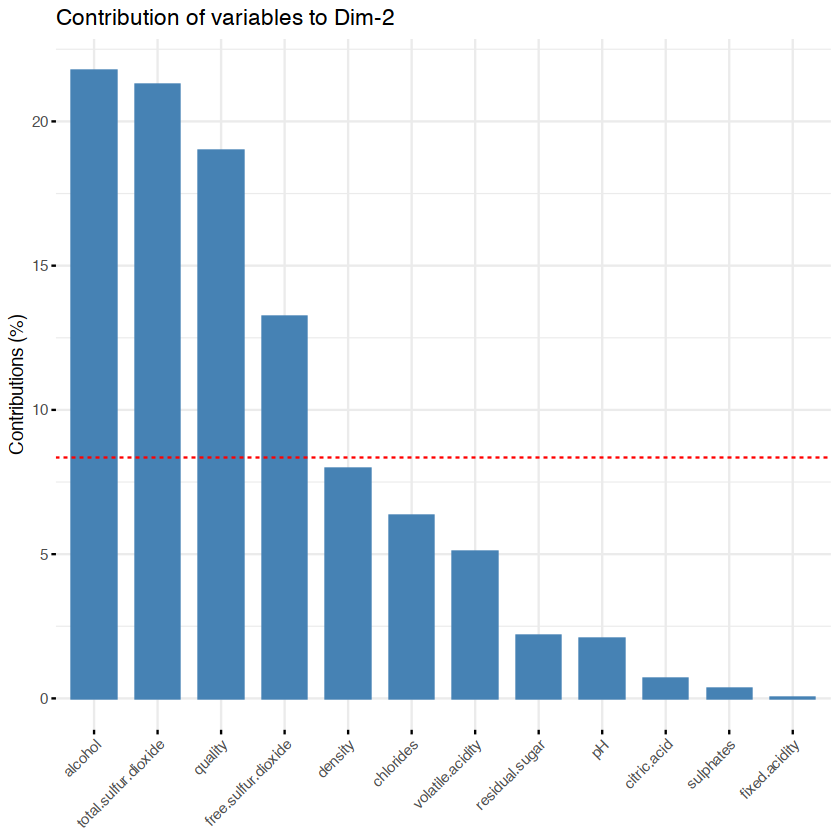

In [19]:
# Plot of variables
fviz_famd_var(res.famd, repel = TRUE)
# Contribution to the first dimension
fviz_contrib(res.famd, "var", axes = 1)
# Contribution to the second dimension
fviz_contrib(res.famd, "var", axes = 2)

### Quantitative variables

In [20]:
quanti.var <- get_famd_var(res.famd, "quanti.var")
quanti.var 

FAMD results for quantitative variables 
  Name       Description                      
1 "$coord"   "Coordinates"                    
2 "$cos2"    "Cos2, quality of representation"
3 "$contrib" "Contributions"                  

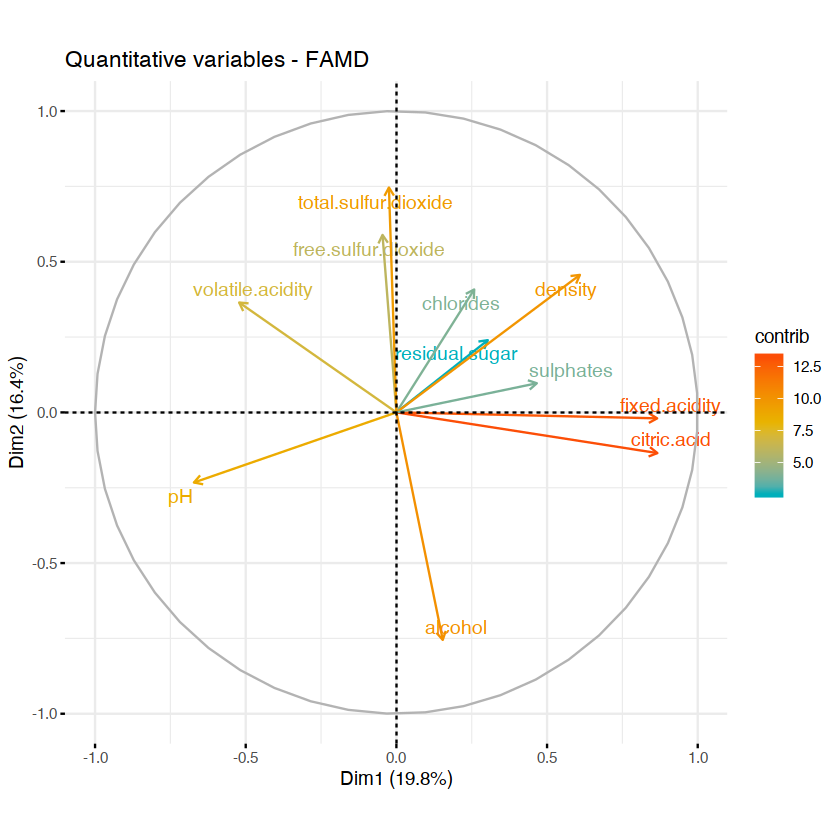

In [22]:
fviz_famd_var(res.famd, "quanti.var", col.var = "contrib", 
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE)

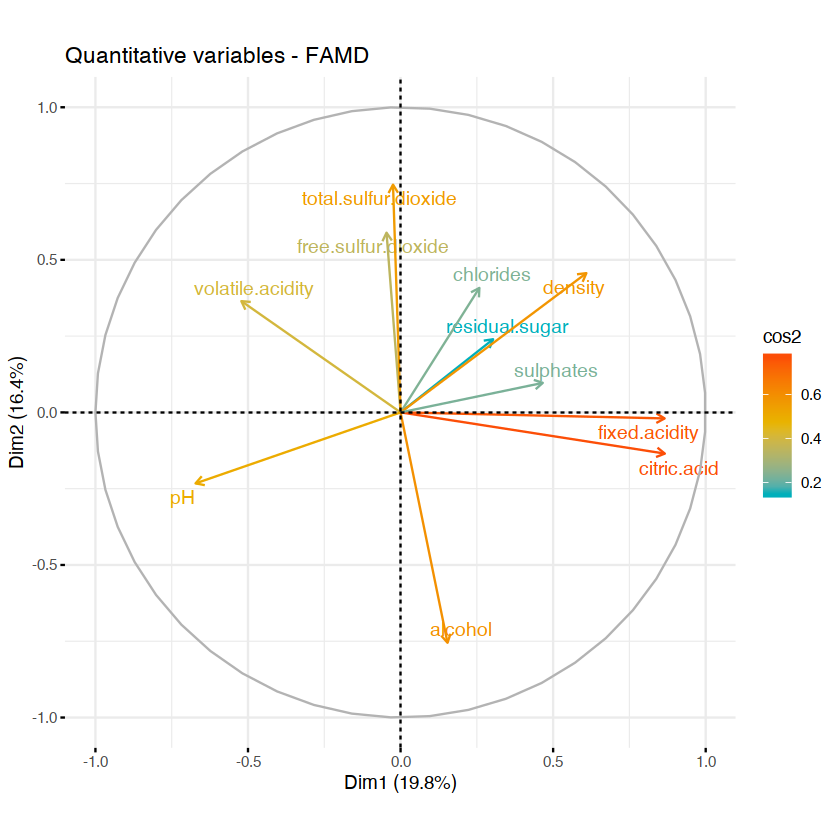

In [23]:
# Color by cos2 values: quality on the factor map
fviz_famd_var(res.famd, "quanti.var", col.var = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), 
             repel = TRUE)

### Graph of qualitative variables

In [24]:
quali.var <- get_famd_var(res.famd, "quali.var")
quali.var 

FAMD results for qualitative variable categories 
  Name       Description                      
1 "$coord"   "Coordinates"                    
2 "$cos2"    "Cos2, quality of representation"
3 "$contrib" "Contributions"                  

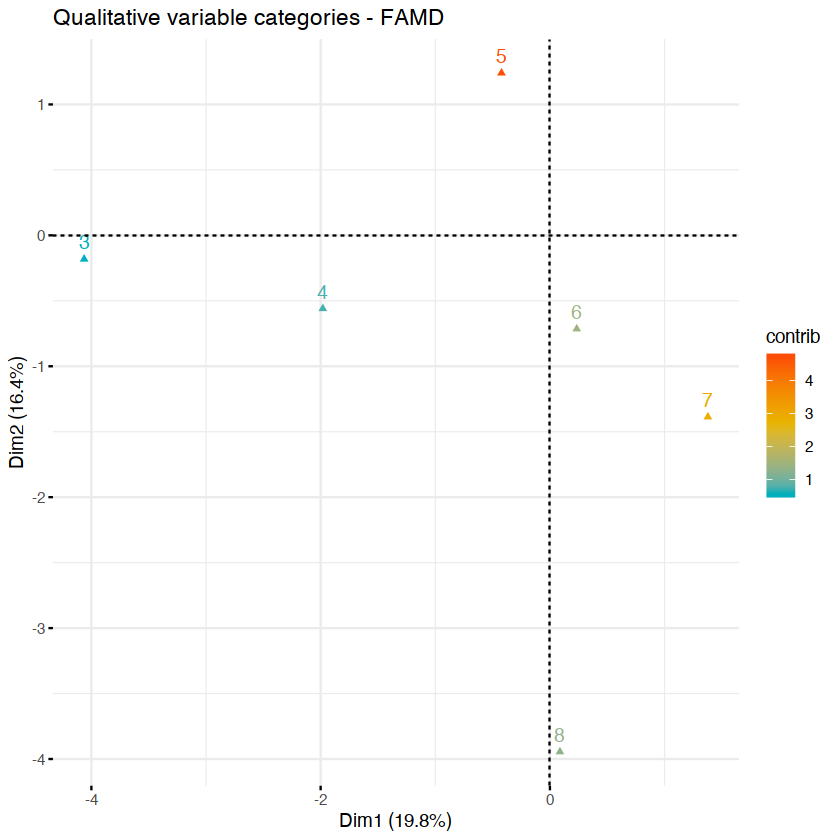

In [25]:
fviz_famd_var(res.famd, "quali.var", col.var = "contrib", 
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07")
             )

### Graph of individuals

In [26]:
ind <- get_famd_ind(res.famd)
ind

FAMD results for individuals 
  Name       Description                      
1 "$coord"   "Coordinates"                    
2 "$cos2"    "Cos2, quality of representation"
3 "$contrib" "Contributions"                  

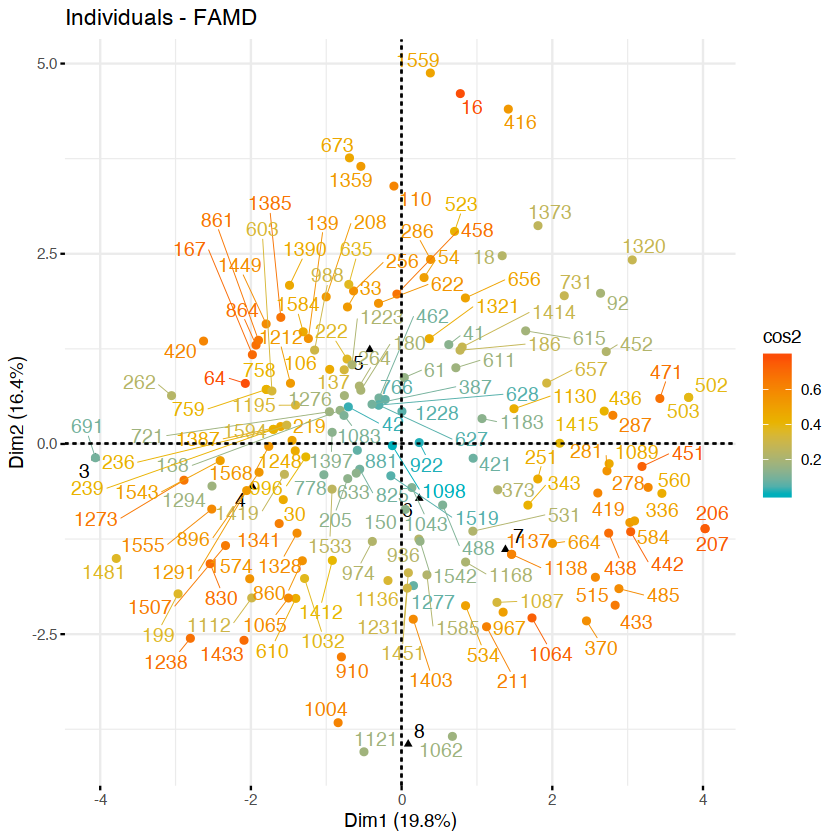

In [27]:
fviz_famd_ind(res.famd, col.ind = "cos2", 
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE)

In [28]:
fviz_mfa_ind(res.famd, 
             habillage = "Label", # color by groups 
             palette = c("#00AFBB", "#E7B800", "#FC4E07"),
             addEllipses = TRUE, ellipse.type = "confidence", 
             repel = TRUE # Avoid text overlapping
             ) 

ERROR: Error in data.frame(..., check.names = FALSE): arguments imply differing number of rows: 0, 160


In [ ]:
fviz_ellipses(res.famd, c("Label", "Soil"), repel = TRUE)


In [ ]:
fviz_ellipses(res.famd, 1:2, geom = "point")
